In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')
df

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,1/1/2017 0:00,6.559,73.80,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:20,6.313,74.50,0.080,0.062,0.100,29128.10127
2,1/1/2017 0:40,5.921,75.70,0.081,0.048,0.085,27335.69620
3,1/1/2017 1:00,5.641,77.70,0.080,0.048,0.096,25998.98734
4,1/1/2017 1:20,5.678,78.10,0.081,0.066,0.141,24777.72152
...,...,...,...,...,...,...,...
18340,9/12/2017 17:20,25.410,43.21,0.276,342.200,39.920,35770.61947
18341,9/12/2017 17:40,25.500,42.95,0.273,295.900,48.710,36165.66372
18342,9/12/2017 18:00,24.980,44.61,0.272,237.400,53.660,36643.53982
18343,9/12/2017 18:20,24.430,46.22,0.273,102.700,50.040,38344.77876


In [3]:
Corr_Matrix = round(df.corr(),2)
print(Corr_Matrix)

                     Temperature  Humidity  Zephyr  GeneralDiffuseFlows  \
Temperature                 1.00     -0.47    0.52                 0.47   
Humidity                   -0.47      1.00   -0.17                -0.48   
Zephyr                      0.52     -0.17    1.00                 0.14   
GeneralDiffuseFlows         0.47     -0.48    0.14                 1.00   
DiffuseFlows                0.16     -0.25   -0.00                 0.54   
PowerConsumption            0.42     -0.29    0.17                 0.17   

                     DiffuseFlows  PowerConsumption  
Temperature                  0.16              0.42  
Humidity                    -0.25             -0.29  
Zephyr                      -0.00              0.17  
GeneralDiffuseFlows          0.54              0.17  
DiffuseFlows                 1.00              0.05  
PowerConsumption             0.05              1.00  


C:\Users\praya\AppData\Local\Temp\ipykernel_25968\3695272549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix = round(df.corr(),2)


C:\Users\praya\AppData\Local\Temp\ipykernel_25968\3903082657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_full_health = df.corr()


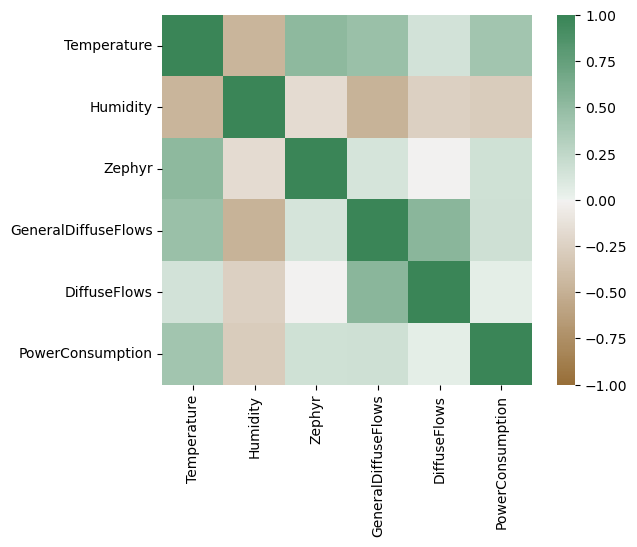

In [4]:
correlation_full_health = df.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

HENCE WE HAVE TO INCLUDE ALL THE VARIABLES, BUT WE STILL CAN LOOK FOR A NEW VARIABLE THAT COMPRISES OF THE EXISTING ONES

In [5]:
df['wd'] = pd.to_datetime(df['Datetime']).dt.day_of_week
# df['weekday'] = pd.to_datetime(df['Datetime']).dt.weekday_name
df['hour'] = pd.to_datetime(df['Datetime']).dt.hour
df['minute'] = pd.to_datetime(df['Datetime']).dt.minute
df

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,wd,hour,minute
0,1/1/2017 0:00,6.559,73.80,0.083,0.051,0.119,34055.69620,6,0,0
1,1/1/2017 0:20,6.313,74.50,0.080,0.062,0.100,29128.10127,6,0,20
2,1/1/2017 0:40,5.921,75.70,0.081,0.048,0.085,27335.69620,6,0,40
3,1/1/2017 1:00,5.641,77.70,0.080,0.048,0.096,25998.98734,6,1,0
4,1/1/2017 1:20,5.678,78.10,0.081,0.066,0.141,24777.72152,6,1,20
...,...,...,...,...,...,...,...,...,...,...
18340,9/12/2017 17:20,25.410,43.21,0.276,342.200,39.920,35770.61947,1,17,20
18341,9/12/2017 17:40,25.500,42.95,0.273,295.900,48.710,36165.66372,1,17,40
18342,9/12/2017 18:00,24.980,44.61,0.272,237.400,53.660,36643.53982,1,18,0
18343,9/12/2017 18:20,24.430,46.22,0.273,102.700,50.040,38344.77876,1,18,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18345 entries, 0 to 18344
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             18345 non-null  object 
 1   Temperature          18345 non-null  float64
 2   Humidity             18345 non-null  float64
 3   Zephyr               18345 non-null  float64
 4   GeneralDiffuseFlows  18345 non-null  float64
 5   DiffuseFlows         18345 non-null  float64
 6   PowerConsumption     18345 non-null  float64
 7   wd                   18345 non-null  int64  
 8   hour                 18345 non-null  int64  
 9   minute               18345 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 1.4+ MB


In [7]:
new_col = []
for index in range(len(df['hour'])):
    new_col.append((df['hour'][index] + df['minute'][index]/60)/24)

df['time'] = new_col
df.head()

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,wd,hour,minute,time
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,6,0,0,0.000000
1,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,6,0,20,0.013889
2,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,6,0,40,0.027778
3,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,6,1,0,0.041667
4,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,6,1,20,0.055556


In [8]:
df

,Datetime,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,wd,hour,minute,time
0,1/1/2017 0:00,6.559,73.80,0.083,0.051,0.119,34055.69620,6,0,0,0.000000
1,1/1/2017 0:20,6.313,74.50,0.080,0.062,0.100,29128.10127,6,0,20,0.013889
2,1/1/2017 0:40,5.921,75.70,0.081,0.048,0.085,27335.69620,6,0,40,0.027778
3,1/1/2017 1:00,5.641,77.70,0.080,0.048,0.096,25998.98734,6,1,0,0.041667
4,1/1/2017 1:20,5.678,78.10,0.081,0.066,0.141,24777.72152,6,1,20,0.055556
...,...,...,...,...,...,...,...,...,...,...,...
18340,9/12/2017 17:20,25.410,43.21,0.276,342.200,39.920,35770.61947,1,17,20,0.722222
18341,9/12/2017 17:40,25.500,42.95,0.273,295.900,48.710,36165.66372,1,17,40,0.736111
18342,9/12/2017 18:00,24.980,44.61,0.272,237.400,53.660,36643.53982,1,18,0,0.750000
18343,9/12/2017 18:20,24.430,46.22,0.273,102.700,50.040,38344.77876,1,18,20,0.763889


In [9]:
X = df.drop(columns=['Datetime','PowerConsumption', 'hour', 'minute'])
X.head(2)

,Temperature,Humidity,Zephyr,GeneralDiffuseFlows,DiffuseFlows,wd,time
0,6.559,73.8,0.083,0.051,0.119,6,0.000000
1,6.313,74.5,0.080,0.062,0.100,6,0.013889


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X.copy())
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.10000000e-02, 1.19000000e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.20000000e-02, 1.00000000e-01, 1.38888889e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.80000000e-02, 8.50000000e-02, 2.77777778e-02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.37400000e+02, 5.36600000e+01, 7.50000000e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.02700000e+02, 5.00400000e+01, 7.63888889e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.12800000e+02, 5.29600000e+01, 7.77777778e-01]])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
ct = ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['wd'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

c:\Users\praya\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.10000000e-02, 1.19000000e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.20000000e-02, 1.00000000e-01, 1.38888889e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.80000000e-02, 8.50000000e-02, 2.77777778e-02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.37400000e+02, 5.36600000e+01, 7.50000000e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.02700000e+02, 5.00400000e+01, 7.63888889e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.12800000e+02, 5.29600000e+01, 7.77777778e-01]])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe_lin = Pipeline(steps=[
    ('step1', ct),
    ('step2', LinearRegression())
])

In [14]:
y = df['PowerConsumption']
y.head(2)

0    34055.69620
1    29128.10127
Name: PowerConsumption, dtype: float64

In [15]:
pipe_lin.fit(X, y)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames